# NPF Network Sci.Workshop-Practical Session

Welcome to the hands-on network analysis session. Let's have some fun 😏!


*By Yukun   
June, 2021*

# Preparing Data



## Graph Representation
Network are essentially matrix. Adjecency matrix has the crux of two nodes indicating an existing connectin or not. We use binary values for unweighted graph and real values for weighted graph. 

The problem with this approach is that it is not memory-efficient. Often times the network is sparse and there are way more zeros than ones. Another method is just to store the edges as a list, then we can convert the list to a matrix.

![Graph Representation](https://textbook.coleridgeinitiative.org/ChapterNetworks/figures/fig8-1.png)


In [7]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


## Querying Data from Bonusly API 

You only need to run through the code. I have wrapped up the API calling and data cleaning for you. Basically, we constructing a edge list and a node list by querying real-time Bonusly API.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import sys
# sys.path.append('drive/MyDrive/workshop/')
from bonously import generate_network_data

In [ ]:
edge_list, node_list= generate_network_data()

Staring from 0... Scraped 0 records
Staring from 100... Scraped 100 records
Staring from 200... Scraped 200 records
Staring from 300... Scraped 300 records
Staring from 400... Scraped 400 records
Staring from 500... Scraped 406 records
Finished with 742 edges and 49 nodes


In [ ]:
import plotly.express as px
import pandas as pd
import plotly
# plotly.io.renderers.default = 'colab'

Alternative: if accessing the data scraping script from google drive does not work. Un-comment (removing the # symbol for each line) the following code to load the datasets.

In [ ]:
# node_list = pd.read_csv('')
# edge_list= pd.read.csv('')

Let's take a look at our datasets.

In [ ]:
node_list.head()

,id,short_name,full_name,display_name,username,email,path,full_pic_url,profile_pic_url,first_name,last_name,last_active_at,created_at,external_unique_id,budget_boost,user_mode,country,time_zone,can_receive,can_give,give_amounts,suggested_give_amounts,custom_properties,status,hired_on,manager_email,division,employee_number,job_title,department,location,admin
0,60194850b332a50011c4836e,Travis Taniguchi,Travis Taniguchi,Travis Taniguchi,ttaniguchi,ttaniguchi@policefoundation.org,/company/users/60194850b332a50011c4836e,https://bonusly-fog.s3.amazonaws.com/uploads/u...,https://bonusly-fog.s3.amazonaws.com/uploads/u...,Travis,Taniguchi,2021-06-08T17:30:40Z,2021-02-02T12:40:48Z,117,0,benefactor,US,America/New_York,True,True,"[5, 10, 15, 20, 25]","[{'dataValue': 0, 'name': '0 Heroes'}, {'dataV...","{'department': None, 'location': None, 'role':...",active,2020-05-29,jburch@policefoundation.org,research,10003,"director, research division",NaN,NaN,NaN
0,6019484eb332a50011c4835c,Karen Amendola,Karen Amendola,Karen Amendola,kamendola,kamendola@policefoundation.org,/company/users/6019484eb332a50011c4835c,https://bonusly-fog.s3.amazonaws.com/uploads/u...,https://bonusly-fog.s3.amazonaws.com/uploads/u...,Karen,Amendola,2021-06-07T20:38:19Z,2021-02-02T12:40:46Z,116,0,normal,US,America/New_York,True,True,"[5, 10, 15, 20, 25]","[{'dataValue': 0, 'name': '0 Heroes'}, {'dataV...","{'department': None, 'location': None, 'role':...",active,2000-06-28,ttaniguchi@policefoundation.org,research,227,chief behavioral scientist,NaN,NaN,NaN
0,60ad129ec473a800672fa7da,Brianna Sclafani,Brianna Sclafani,Brianna Sclafani,bsclafani,bsclafani@policefoundation.org,/company/users/60ad129ec473a800672fa7da,https://bonusly-fog.s3.amazonaws.com/uploads/u...,https://bonusly-fog.s3.amazonaws.com/uploads/u...,Brianna,Sclafani,2021-06-09T15:37:02Z,2021-05-25T15:07:10Z,158,0,normal,US,America/New_York,True,True,"[5, 10, 15, 20, 25]","[{'dataValue': 0, 'name': '0 Heroes'}, {'dataV...","{'department': None, 'location': None, 'role':...",active,2021-05-17,aburstein@policefoundation.org,national programs,10153,NaN,NaN,NaN,NaN
0,5fe473e9c13b360013265de2,Birthday Bot,Birthday Bot,Birthday Bot,bot+5fe473e9c13b360013265de2,bot+5fe473e9c13b360013265de2@bonus.ly,/company/users/5fe473e9c13b360013265de2,https://production-cdn.bonus.ly/assets/avatar/...,https://production-cdn.bonus.ly/assets/avatar/...,Birthday Bot,None,None,2020-12-24T10:56:41Z,None,1000000,bot,None,America/New_York,False,True,"[5, 10, 15, 20, 25]","[{'dataValue': 0, 'name': '0 Heroes'}, {'dataV...","{'department': None, 'location': None, 'role':...",active,None,None,NaN,NaN,NaN,NaN,NaN,NaN
0,602413972b20160014b86e4b,Katherine,Katherine Hoogesteyn,Katherine Hoogesteyn,khoogesteyn,khoogesteyn@policefoundation.org,/company/users/602413972b20160014b86e4b,https://bonusly-fog.s3.amazonaws.com/uploads/u...,https://bonusly-fog.s3.amazonaws.com/uploads/u...,Katherine,Hoogesteyn,2021-06-08T23:59:33Z,2021-02-10T17:10:47Z,168,0,normal,US,America/Los_Angeles,True,True,"[5, 10, 15, 20, 25]","[{'dataValue': 0, 'name': '0 Heroes'}, {'dataV...","{'department': 'research', 'location': 'headqu...",active,2021-01-11,ttaniguchi@policefoundation.org,research,10166,senior research associate,research,headquarters,NaN


In [ ]:
edge_list.head()

,from,to,amount,datetime,reason,hashtags
0,Travis Taniguchi,Katherine Hoogesteyn,20,2021-06-08T17:33:05Z,+20 @khoogesteyn @mlebron for their excellent ...,#excellence-and-quality
0,Karen Amendola,Yukun Yang,10,2021-06-07T20:36:16Z,+10 @yyang Thank you for your great testing of...,#excellence-and-quality
0,Karen Amendola,Yukun Yang,0,2021-06-07T20:38:35Z,![](https://media.tenor.com/images/7fb7aefad0...,None
0,Karen Amendola,Maria Valdovinos Olson Valdovinos,10,2021-06-07T20:35:21Z,+10 @maria.valdovinos.olson.valdovinos Thanks ...,#excellence-and-quality
0,Karen Amendola,Maria Valdovinos Olson Valdovinos,0,2021-06-07T20:37:42Z,"#problem-solving Lineup changes, lol go cubs !...",#problem-solving


In [ ]:
edge_list=edge_list.rename(columns={'amount':'weight'})

Get rid of Bots

In [ ]:
node_list=node_list[node_list['user_mode']!='bot']

In [ ]:
edge_list=edge_list[(edge_list['from'].isin(node_list['display_name']))&
          (edge_list['to'].isin(node_list['display_name']))]

In [ ]:
edge_list

,from,to,weight,datetime,reason,hashtags
0,Travis Taniguchi,Katherine Hoogesteyn,20,2021-06-08T17:33:05Z,+20 @khoogesteyn @mlebron for their excellent ...,#excellence-and-quality
0,Karen Amendola,Yukun Yang,10,2021-06-07T20:36:16Z,+10 @yyang Thank you for your great testing of...,#excellence-and-quality
0,Karen Amendola,Yukun Yang,0,2021-06-07T20:38:35Z,![](https://media.tenor.com/images/7fb7aefad0...,None
0,Karen Amendola,Maria Valdovinos Olson Valdovinos,10,2021-06-07T20:35:21Z,+10 @maria.valdovinos.olson.valdovinos Thanks ...,#excellence-and-quality
0,Karen Amendola,Maria Valdovinos Olson Valdovinos,0,2021-06-07T20:37:42Z,"#problem-solving Lineup changes, lol go cubs !...",#problem-solving
...,...,...,...,...,...,...
0,Fern Hernberg,Jim Burch,0,2021-01-25T13:26:07Z,Way to go!,None
0,Jim Burch,Fern Hernberg,5,2021-01-13T17:23:10Z,@fern.hernberg for getting the promo work done...,#problem-solving
0,Jim Burch,Fern Hernberg,5,2021-01-05T15:11:26Z,+5 @fern.hernberg thank you for taking the tim...,#diverse-and-inclusive
0,Fern Hernberg,Jim Burch,10,2020-12-30T14:46:24Z,+10 @jburch for spreading the excitement about...,#leadership


Duplicated edges: how to do with it? We need to assign weight to the edges.   
Question: How do we want to define weight?

One way is to use the number of awards given and recieved as weights. Let's try this:

In [ ]:
edge_list.groupby(['from','to']).size().reset_index(name='weight')

,from,to,weight
0,Aisha Jamil,Amanda Burstein,1
1,Aisha Jamil,Ben Gorban,3
2,Aisha Jamil,Erica Richardson,5
3,Aisha Jamil,Karen Amendola,1
4,Aisha Jamil,Kerry Yerico,1
...,...,...,...
339,Yukun Yang,Karen Amendola,1
340,Yukun Yang,Maria Valdovinos Olson Valdovinos,1
341,Yukun Yang,Pauline Alvarado,2
342,Yukun Yang,Sarita Coletrane,3


Of course, as the bonous has a value, we can also weight it not only based on counts but also the amount that was given in each bonus rewarding. In this way, we need to add up the amount of bonus from one person to the other as the weight.

In [ ]:
edge_list.groupby(['from','to']).agg(weight_sum=('weight','sum'), 
                                     weight_count=('weight','count')).reset_index()

,from,to,weight_sum,weight_count
0,Aisha Jamil,Amanda Burstein,10,1
1,Aisha Jamil,Ben Gorban,55,3
2,Aisha Jamil,Erica Richardson,70,5
3,Aisha Jamil,Karen Amendola,15,1
4,Aisha Jamil,Kerry Yerico,15,1
...,...,...,...,...
339,Yukun Yang,Karen Amendola,30,1
340,Yukun Yang,Maria Valdovinos Olson Valdovinos,15,1
341,Yukun Yang,Pauline Alvarado,20,2
342,Yukun Yang,Sarita Coletrane,45,3


In [ ]:
edge_list_weighted=edge_list.groupby(['from','to']).agg(weight_sum=('weight','sum'), 
                                     weight_count=('weight','count')).reset_index()

Now we have processed our data. Before moving forward, it is better to contemplate on the big picture:

- What does this network represent:
  - Of course it is a appreciation network
  - But we can also use this to approximate the collaboration pattern in the NPF

- What questions can be answered in this network:
  - Who is the important figure in this network? (Centrality analysis)
  - Does people like to more like to give awards? How does division/title affect this differnce, if exists. (Centrality analysis & Degree distribution)
  - Does people work diversely? (Assortativity & Diameter & Shortest Path)
  - Are there small circles formed in the work? (Assortativity & Clustering coefficinet & Transitivity)
  - ....




# Importing dataset into Networkx

In this section, we will transform the data we have collected into our network analysis package-networkx.

In [ ]:
import networkx as nx
import pandas as pd

In [ ]:
# Decprecated
# G=nx.from_pandas_edgelist(edge_list, source='from', target='to', edge_attr=True, create_using=nx.MultiDiGraph())

Let's just use the count as weight as default graph. We will name this network as G. The sum of amount we will call this G_sum.

In [ ]:
G=nx.from_pandas_edgelist(edge_list_weighted, source='from', target='to', edge_attr='weight_count', create_using=nx.DiGraph())

In [ ]:
len(G.edges)

344

In [ ]:
G_sum=nx.from_pandas_edgelist(edge_list_weighted, source='from', target='to', edge_attr='weight_sum', create_using=nx.DiGraph())

# Analyzing the Network

## Retrieving node/edge informations

In [ ]:
G.nodes(data=True)

NodeDataView({'Aisha Jamil': {}, 'Amanda Burstein': {}, 'Ben Gorban': {}, 'Erica Richardson': {}, 'Karen Amendola': {}, 'Kerry Yerico': {}, 'Lorena Singer': {}, 'Maria Valdovinos Olson Valdovinos': {}, 'Mary Kate Murphy': {}, 'Rick Haake': {}, 'Sarita Coletrane': {}, 'Tamara Martin': {}, 'Trenay Wren-Evans': {}, 'Yukun Yang': {}, 'Brett Cowell': {}, 'Brianna Sclafani': {}, 'Danielle Parsons': {}, 'Eiryn Renouard': {}, 'Julia Kessler': {}, 'Sarah Vanselow': {}, 'Travis Taniguchi': {}, 'Christine Johnson': {}, 'Dominique Burton': {}, 'Heather Vovak': {}, 'Jen Zeunik': {}, 'Katherine Hoogesteyn': {}, 'Michael Lebron': {}, 'Pauline Alvarado': {}, 'Scarlett Ojeda Geldres': {}, 'Danielle Boekankamp': {}, 'Garrett Johnson': {}, 'Frank Straub': {}, 'Elizabeth Fontaine': {}, 'Fern Hernberg': {}, 'Jim Burch': {}, 'Travis Riddle': {}, 'Jane Mott-Palmer': {}, 'Rebecca Benson': {}, 'Virgil Young': {}})

In [ ]:
G.edges(data=True)

OutEdgeDataView([('Aisha Jamil', 'Amanda Burstein', {'weight_count': 1}), ('Aisha Jamil', 'Ben Gorban', {'weight_count': 3}), ('Aisha Jamil', 'Erica Richardson', {'weight_count': 5}), ('Aisha Jamil', 'Karen Amendola', {'weight_count': 1}), ('Aisha Jamil', 'Kerry Yerico', {'weight_count': 1}), ('Aisha Jamil', 'Lorena Singer', {'weight_count': 1}), ('Aisha Jamil', 'Maria Valdovinos Olson Valdovinos', {'weight_count': 3}), ('Aisha Jamil', 'Mary Kate Murphy', {'weight_count': 1}), ('Aisha Jamil', 'Rick Haake', {'weight_count': 1}), ('Aisha Jamil', 'Sarita Coletrane', {'weight_count': 2}), ('Aisha Jamil', 'Tamara Martin', {'weight_count': 1}), ('Aisha Jamil', 'Trenay Wren-Evans', {'weight_count': 1}), ('Aisha Jamil', 'Yukun Yang', {'weight_count': 1}), ('Amanda Burstein', 'Ben Gorban', {'weight_count': 3}), ('Amanda Burstein', 'Brett Cowell', {'weight_count': 3}), ('Amanda Burstein', 'Brianna Sclafani', {'weight_count': 1}), ('Amanda Burstein', 'Danielle Parsons', {'weight_count': 1}), ('Am

Note that the node information is empty. Now we add some node attributes from our node list dataset.

In [ ]:
selected_node_attributes=node_list[['display_name','division','job_title','time_zone']]
selected_node_attributes.head()

,display_name,division,job_title,time_zone
0,Travis Taniguchi,research,"director, research division",America/New_York
0,Karen Amendola,research,chief behavioral scientist,America/New_York
0,Brianna Sclafani,national programs,NaN,America/New_York
0,Katherine Hoogesteyn,research,senior research associate,America/Los_Angeles
0,Yukun Yang,research,data scientist (senior project associate),America/New_York


Now we add the attributes of nodes using ```nx.set_node_attributes``` function.

In [ ]:
nx.set_node_attributes(G, selected_node_attributes.set_index('display_name').to_dict('index'))

Now let's look at the nodes in the Graph

In [ ]:
G.nodes(data=True)

NodeDataView({'Aisha Jamil': {'division': 'development & marketing', 'job_title': 'lead editor and content developer (communications specialist)', 'time_zone': 'America/New_York'}, 'Amanda Burstein': {'division': 'national programs', 'job_title': 'interim director, national programs', 'time_zone': 'America/New_York'}, 'Ben Gorban': {'division': 'national programs', 'job_title': 'senior project associate', 'time_zone': 'America/New_York'}, 'Erica Richardson': {'division': 'development & marketing', 'job_title': 'digital communications and media relations lead (communications specialist)', 'time_zone': 'America/New_York'}, 'Karen Amendola': {'division': 'research', 'job_title': 'chief behavioral scientist', 'time_zone': 'America/New_York'}, 'Kerry Yerico': {'division': 'national programs', 'job_title': 'senior program manager', 'time_zone': 'America/New_York'}, 'Lorena Singer': {'division': 'international', 'job_title': 'regional manager', 'time_zone': 'America/Los_Angeles'}, 'Maria Vald

## Retrieving Neighbors

In [ ]:
list(G.neighbors('Karen Amendola'))

['Aisha Jamil',
 'Ben Gorban',
 'Brett Cowell',
 'Christine Johnson',
 'Danielle Boekankamp',
 'Erica Richardson',
 'Heather Vovak',
 'Jen Zeunik',
 'Katherine Hoogesteyn',
 'Kerry Yerico',
 'Maria Valdovinos Olson Valdovinos',
 'Michael Lebron',
 'Pauline Alvarado',
 'Rick Haake',
 'Sarita Coletrane',
 'Travis Riddle',
 'Travis Taniguchi',
 'Yukun Yang']

## Retrieving Node/Edge Attributes

In [ ]:
G.nodes['Karen Amendola']

{'division': 'research',
 'job_title': 'chief behavioral scientist',
 'time_zone': 'America/New_York'}

In [ ]:
G.nodes['Karen Amendola']['division']

'research'

In [ ]:
G.edges[('Karen Amendola', 'Maria Valdovinos Olson Valdovinos')]

{'weight_count': 5}

In [ ]:
G.edges[('Karen Amendola', 'Maria Valdovinos Olson Valdovinos')]['weight_count']

5

## Summarizing Global Network Statistics

### What is the diameter of the graph?

In [ ]:
nx.diameter(G)

NetworkXError: ignored

![connectivity](http://www.cs.emory.edu/~cheung/Courses/253/Syllabus/Graph/FIGS/Graphs/graph70.gif)

In [ ]:
nx.is_strongly_connected(G)

False

In [ ]:
nx.is_weakly_connected(G)

True

The diameter of a graph is the longest shortest path of a connected graph.  It is computed by determining the shortest path length between each set of vertices in the graph and then determining the longest of these.  If two vertices are disconnected and the graph is disconnected, the path length between the two is infinity and the diameter of the graph is infinity. 



In [ ]:
for com in nx.strongly_connected_components(G):
  print(com)

{'Danielle Boekankamp'}
{'Michael Lebron', 'Pauline Alvarado', 'Rebecca Benson', 'Sarita Coletrane', 'Travis Taniguchi', 'Aisha Jamil', 'Brianna Sclafani', 'Christine Johnson', 'Maria Valdovinos Olson Valdovinos', 'Jim Burch', 'Eiryn Renouard', 'Scarlett Ojeda Geldres', 'Jen Zeunik', 'Amanda Burstein', 'Lorena Singer', 'Heather Vovak', 'Rick Haake', 'Elizabeth Fontaine', 'Julia Kessler', 'Trenay Wren-Evans', 'Erica Richardson', 'Mary Kate Murphy', 'Danielle Parsons', 'Sarah Vanselow', 'Kerry Yerico', 'Fern Hernberg', 'Frank Straub', 'Ben Gorban', 'Karen Amendola', 'Brett Cowell', 'Garrett Johnson', 'Dominique Burton', 'Yukun Yang', 'Travis Riddle', 'Tamara Martin', 'Jane Mott-Palmer', 'Katherine Hoogesteyn'}
{'Virgil Young'}


In [ ]:
nx.diameter(G.to_undirected())

3

### What is the Density of the Graph

In [ ]:
nx.density(G)

0.2321187584345479

In [ ]:
len(G.edges)

344

### What is the degree distribution of the Graph

In [ ]:
G.in_degree(weight='weight_count')

InDegreeView({'Aisha Jamil': 31, 'Amanda Burstein': 1, 'Ben Gorban': 46, 'Erica Richardson': 25, 'Karen Amendola': 19, 'Kerry Yerico': 17, 'Lorena Singer': 10, 'Maria Valdovinos Olson Valdovinos': 29, 'Mary Kate Murphy': 13, 'Rick Haake': 13, 'Sarita Coletrane': 54, 'Tamara Martin': 1, 'Trenay Wren-Evans': 9, 'Yukun Yang': 29, 'Brett Cowell': 15, 'Brianna Sclafani': 6, 'Danielle Parsons': 26, 'Eiryn Renouard': 18, 'Julia Kessler': 19, 'Sarah Vanselow': 16, 'Travis Taniguchi': 19, 'Christine Johnson': 25, 'Dominique Burton': 15, 'Heather Vovak': 11, 'Jen Zeunik': 11, 'Katherine Hoogesteyn': 15, 'Michael Lebron': 15, 'Pauline Alvarado': 20, 'Scarlett Ojeda Geldres': 12, 'Danielle Boekankamp': 8, 'Garrett Johnson': 12, 'Frank Straub': 3, 'Elizabeth Fontaine': 11, 'Fern Hernberg': 5, 'Jim Burch': 7, 'Travis Riddle': 19, 'Jane Mott-Palmer': 5, 'Rebecca Benson': 3, 'Virgil Young': 0})

In [ ]:
G.out_degree(weight='weight_count')

OutDegreeView({'Aisha Jamil': 22, 'Amanda Burstein': 25, 'Ben Gorban': 21, 'Erica Richardson': 7, 'Karen Amendola': 55, 'Kerry Yerico': 15, 'Lorena Singer': 27, 'Maria Valdovinos Olson Valdovinos': 20, 'Mary Kate Murphy': 3, 'Rick Haake': 14, 'Sarita Coletrane': 33, 'Tamara Martin': 11, 'Trenay Wren-Evans': 8, 'Yukun Yang': 19, 'Brett Cowell': 12, 'Brianna Sclafani': 4, 'Danielle Parsons': 6, 'Eiryn Renouard': 11, 'Julia Kessler': 16, 'Sarah Vanselow': 7, 'Travis Taniguchi': 34, 'Christine Johnson': 19, 'Dominique Burton': 12, 'Heather Vovak': 15, 'Jen Zeunik': 33, 'Katherine Hoogesteyn': 22, 'Michael Lebron': 13, 'Pauline Alvarado': 22, 'Scarlett Ojeda Geldres': 17, 'Danielle Boekankamp': 1, 'Garrett Johnson': 8, 'Frank Straub': 6, 'Elizabeth Fontaine': 7, 'Fern Hernberg': 8, 'Jim Burch': 29, 'Travis Riddle': 9, 'Jane Mott-Palmer': 7, 'Rebecca Benson': 5, 'Virgil Young': 10})

In [ ]:
G.out_degree(weight=None)

OutDegreeView({'Aisha Jamil': 13, 'Amanda Burstein': 10, 'Ben Gorban': 15, 'Erica Richardson': 7, 'Karen Amendola': 18, 'Kerry Yerico': 9, 'Lorena Singer': 9, 'Maria Valdovinos Olson Valdovinos': 12, 'Mary Kate Murphy': 3, 'Rick Haake': 6, 'Sarita Coletrane': 20, 'Tamara Martin': 6, 'Trenay Wren-Evans': 7, 'Yukun Yang': 13, 'Brett Cowell': 8, 'Brianna Sclafani': 4, 'Danielle Parsons': 5, 'Eiryn Renouard': 6, 'Julia Kessler': 7, 'Sarah Vanselow': 4, 'Travis Taniguchi': 14, 'Christine Johnson': 10, 'Dominique Burton': 7, 'Heather Vovak': 11, 'Jen Zeunik': 16, 'Katherine Hoogesteyn': 13, 'Michael Lebron': 8, 'Pauline Alvarado': 14, 'Scarlett Ojeda Geldres': 11, 'Danielle Boekankamp': 1, 'Garrett Johnson': 4, 'Frank Straub': 5, 'Elizabeth Fontaine': 6, 'Fern Hernberg': 4, 'Jim Burch': 18, 'Travis Riddle': 7, 'Jane Mott-Palmer': 4, 'Rebecca Benson': 4, 'Virgil Young': 5})

In [ ]:
G.in_degree(weight=None)

InDegreeView({'Aisha Jamil': 18, 'Amanda Burstein': 1, 'Ben Gorban': 26, 'Erica Richardson': 14, 'Karen Amendola': 11, 'Kerry Yerico': 8, 'Lorena Singer': 6, 'Maria Valdovinos Olson Valdovinos': 16, 'Mary Kate Murphy': 9, 'Rick Haake': 6, 'Sarita Coletrane': 24, 'Tamara Martin': 1, 'Trenay Wren-Evans': 7, 'Yukun Yang': 12, 'Brett Cowell': 10, 'Brianna Sclafani': 6, 'Danielle Parsons': 10, 'Eiryn Renouard': 10, 'Julia Kessler': 8, 'Sarah Vanselow': 7, 'Travis Taniguchi': 11, 'Christine Johnson': 13, 'Dominique Burton': 9, 'Heather Vovak': 7, 'Jen Zeunik': 9, 'Katherine Hoogesteyn': 8, 'Michael Lebron': 12, 'Pauline Alvarado': 12, 'Scarlett Ojeda Geldres': 8, 'Danielle Boekankamp': 6, 'Garrett Johnson': 7, 'Frank Straub': 3, 'Elizabeth Fontaine': 4, 'Fern Hernberg': 3, 'Jim Burch': 3, 'Travis Riddle': 11, 'Jane Mott-Palmer': 5, 'Rebecca Benson': 3, 'Virgil Young': 0})

In [ ]:
from collections import Counter 

def plot_degree_dist(G=G,weight=False, graph_type='both', include_hist=False, weight_name='weight_count'):
  '''
  parameters:
  weight = True/False. True -> Using weight of the edges for degree calculation. 
  graph_type = both/indegree/outdegree. both -> Plotting both indegree and outdegree.
  include_hist = True/False -> Including the histrogam of the degree distribution or not.
  weight_name -> Name of the edge attr that can be used as weight.
  '''
  
  if weight==True:
    indegrees=G.in_degree(weight=weight_name)
    outdegrees=G.out_degree(weight=weight_name)

  else:
    indegrees=G.in_degree(weight=None)
    outdegrees=G.out_degree(weight=None)
  
  in_degree_counts=Counter(dict(indegrees).values())
  out_degree_counts=Counter(dict(outdegrees).values())
  
  in_degree_df=pd.DataFrame({'degree':in_degree_counts.keys(), 'count':in_degree_counts.values()})
  in_degree_df['type']='indegree'

  out_degree_df=pd.DataFrame({'degree':out_degree_counts.keys(), 'count':out_degree_counts.values()})
  out_degree_df['type']='outdegree'

  degree_df=pd.concat([in_degree_df, out_degree_df])

  raw_degrees=pd.concat([pd.DataFrame({'indegrees':dict(indegrees).values(),'type':'indegree'}),
                      pd.DataFrame({'indegrees':dict(outdegrees).values(),'type':'outdegree'})])
  
  

  if graph_type!='both':
    degree_df=degree_df[degree_df['type']==graph_type]
    raw_degrees=raw_degrees[raw_degrees['type']==graph_type]
  
  fig=px.scatter(degree_df.sort_values('degree'),x='degree', y='count', color='type').update_traces(mode='markers+lines')
  fig.show()

  if include_hist==True:
    hist=px.histogram(raw_degrees, color='type', barmode='overlay',marginal="box")
    hist.show()


In [ ]:
plot_degree_dist(weight=False, include_hist=True)

In [ ]:
plot_degree_dist(weight=True, include_hist=True)

### What is the average clustering coefficient of the Graph

In [ ]:
nx.average_clustering(G)

0.4407959051312966

### What's the average shortest path length of the Graph

In [ ]:
nx.average_shortest_path_length(G)

1.8502024291497976

### What's the assortativity of the Graph

In [ ]:
nx.assortativity.degree_assortativity_coefficient(G)

-0.05578910129484883

In [ ]:
nx.attribute_assortativity_coefficient(G, "division")

0.22541298113817207

In [ ]:
nx.attribute_assortativity_coefficient(G, "job_title")

0.03490310668124697

## Acessing Local Network Statisctics

### Degree centrality

In [ ]:
sorted(nx.centrality.degree_centrality(G).items(), key=lambda x:x[-1], reverse=True)

[('Sarita Coletrane', 1.1578947368421053),
 ('Ben Gorban', 1.0789473684210527),
 ('Aisha Jamil', 0.8157894736842105),
 ('Karen Amendola', 0.763157894736842),
 ('Maria Valdovinos Olson Valdovinos', 0.7368421052631579),
 ('Pauline Alvarado', 0.6842105263157894),
 ('Yukun Yang', 0.6578947368421052),
 ('Travis Taniguchi', 0.6578947368421052),
 ('Jen Zeunik', 0.6578947368421052),
 ('Christine Johnson', 0.6052631578947368),
 ('Erica Richardson', 0.5526315789473684),
 ('Katherine Hoogesteyn', 0.5526315789473684),
 ('Jim Burch', 0.5526315789473684),
 ('Michael Lebron', 0.5263157894736842),
 ('Scarlett Ojeda Geldres', 0.5),
 ('Brett Cowell', 0.47368421052631576),
 ('Heather Vovak', 0.47368421052631576),
 ('Travis Riddle', 0.47368421052631576),
 ('Kerry Yerico', 0.4473684210526315),
 ('Eiryn Renouard', 0.42105263157894735),
 ('Dominique Burton', 0.42105263157894735),
 ('Lorena Singer', 0.39473684210526316),
 ('Danielle Parsons', 0.39473684210526316),
 ('Julia Kessler', 0.39473684210526316),
 ('T

#### In-degree centrality

In [ ]:
nx.in_degree_centrality(G)
sorted(nx.in_degree_centrality(G).items(), key=lambda x:x[-1], reverse=True)

[('Ben Gorban', 0.6842105263157894),
 ('Sarita Coletrane', 0.631578947368421),
 ('Aisha Jamil', 0.47368421052631576),
 ('Maria Valdovinos Olson Valdovinos', 0.42105263157894735),
 ('Erica Richardson', 0.3684210526315789),
 ('Christine Johnson', 0.3421052631578947),
 ('Yukun Yang', 0.3157894736842105),
 ('Michael Lebron', 0.3157894736842105),
 ('Pauline Alvarado', 0.3157894736842105),
 ('Karen Amendola', 0.2894736842105263),
 ('Travis Taniguchi', 0.2894736842105263),
 ('Travis Riddle', 0.2894736842105263),
 ('Brett Cowell', 0.2631578947368421),
 ('Danielle Parsons', 0.2631578947368421),
 ('Eiryn Renouard', 0.2631578947368421),
 ('Mary Kate Murphy', 0.23684210526315788),
 ('Dominique Burton', 0.23684210526315788),
 ('Jen Zeunik', 0.23684210526315788),
 ('Kerry Yerico', 0.21052631578947367),
 ('Julia Kessler', 0.21052631578947367),
 ('Katherine Hoogesteyn', 0.21052631578947367),
 ('Scarlett Ojeda Geldres', 0.21052631578947367),
 ('Trenay Wren-Evans', 0.18421052631578946),
 ('Sarah Vanselo

#### Out-degree centrality

In [ ]:
nx.out_degree_centrality(G)
sorted(nx.out_degree_centrality(G).items(), key=lambda x:x[-1], reverse=True)

[('Sarita Coletrane', 0.5263157894736842),
 ('Karen Amendola', 0.47368421052631576),
 ('Jim Burch', 0.47368421052631576),
 ('Jen Zeunik', 0.42105263157894735),
 ('Ben Gorban', 0.39473684210526316),
 ('Travis Taniguchi', 0.3684210526315789),
 ('Pauline Alvarado', 0.3684210526315789),
 ('Aisha Jamil', 0.3421052631578947),
 ('Yukun Yang', 0.3421052631578947),
 ('Katherine Hoogesteyn', 0.3421052631578947),
 ('Maria Valdovinos Olson Valdovinos', 0.3157894736842105),
 ('Heather Vovak', 0.2894736842105263),
 ('Scarlett Ojeda Geldres', 0.2894736842105263),
 ('Amanda Burstein', 0.2631578947368421),
 ('Christine Johnson', 0.2631578947368421),
 ('Kerry Yerico', 0.23684210526315788),
 ('Lorena Singer', 0.23684210526315788),
 ('Brett Cowell', 0.21052631578947367),
 ('Michael Lebron', 0.21052631578947367),
 ('Erica Richardson', 0.18421052631578946),
 ('Trenay Wren-Evans', 0.18421052631578946),
 ('Julia Kessler', 0.18421052631578946),
 ('Dominique Burton', 0.18421052631578946),
 ('Travis Riddle', 0.1

### Eigenvector Centrality

In [ ]:
nx.centrality.eigenvector_centrality(G, weight='weight_count')
sorted(nx.centrality.eigenvector_centrality(G, weight='weight_count').items(), key=lambda x:x[-1], reverse=True)

[('Sarita Coletrane', 0.4696718374127965),
 ('Ben Gorban', 0.36094969836157076),
 ('Maria Valdovinos Olson Valdovinos', 0.26755783701591934),
 ('Aisha Jamil', 0.25917701415389893),
 ('Yukun Yang', 0.25737420673573225),
 ('Christine Johnson', 0.23342004370729794),
 ('Erica Richardson', 0.2121849266458605),
 ('Karen Amendola', 0.18724178007306333),
 ('Pauline Alvarado', 0.1827821114796691),
 ('Michael Lebron', 0.1672799176869452),
 ('Elizabeth Fontaine', 0.16488953946049248),
 ('Travis Taniguchi', 0.16443972497505452),
 ('Travis Riddle', 0.16384006307717727),
 ('Danielle Parsons', 0.15578036086007827),
 ('Katherine Hoogesteyn', 0.13096097071540447),
 ('Heather Vovak', 0.12453098158509415),
 ('Dominique Burton', 0.12204135002122837),
 ('Eiryn Renouard', 0.11889150718207095),
 ('Mary Kate Murphy', 0.11789306173709387),
 ('Scarlett Ojeda Geldres', 0.10177710419345304),
 ('Jen Zeunik', 0.09605271885572662),
 ('Julia Kessler', 0.08979537367345475),
 ('Brett Cowell', 0.08444884839901806),
 ('T

### Closeness Centrality

In [ ]:
# nx.centrality.closeness_centrality(G)
sorted(nx.centrality.closeness_centrality(G).items(), key=lambda x:x[-1], reverse=True)

[('Ben Gorban', 0.7505482456140351),
 ('Sarita Coletrane', 0.7063983488132095),
 ('Aisha Jamil', 0.6433270676691729),
 ('Maria Valdovinos Olson Valdovinos', 0.6004385964912281),
 ('Christine Johnson', 0.590595340811044),
 ('Erica Richardson', 0.5810696095076401),
 ('Michael Lebron', 0.5718462823725982),
 ('Karen Amendola', 0.5629111842105263),
 ('Pauline Alvarado', 0.5629111842105263),
 ('Yukun Yang', 0.554251012145749),
 ('Danielle Parsons', 0.554251012145749),
 ('Brett Cowell', 0.54585326953748),
 ('Eiryn Renouard', 0.5377062058130401),
 ('Mary Kate Murphy', 0.5297987616099071),
 ('Scarlett Ojeda Geldres', 0.5221205186880244),
 ('Brianna Sclafani', 0.5146616541353384),
 ('Julia Kessler', 0.5146616541353384),
 ('Travis Taniguchi', 0.5146616541353384),
 ('Jen Zeunik', 0.5146616541353384),
 ('Dominique Burton', 0.5074128984432913),
 ('Trenay Wren-Evans', 0.5003654970760234),
 ('Katherine Hoogesteyn', 0.5003654970760234),
 ('Travis Riddle', 0.4935111751982697),
 ('Heather Vovak', 0.48684

### Betweeness Centrality

In [ ]:
nx.centrality.betweenness_centrality(G)
sorted(nx.centrality.betweenness_centrality(G).items(), key=lambda x:x[-1], reverse=True)

[('Sarita Coletrane', 0.19706860317478556),
 ('Ben Gorban', 0.13770716357148619),
 ('Aisha Jamil', 0.11626047893564596),
 ('Jen Zeunik', 0.04777269140238586),
 ('Scarlett Ojeda Geldres', 0.038268476322492945),
 ('Erica Richardson', 0.034138712060538694),
 ('Karen Amendola', 0.0337787656163013),
 ('Maria Valdovinos Olson Valdovinos', 0.03220390334907766),
 ('Yukun Yang', 0.031757289062276275),
 ('Pauline Alvarado', 0.025923983905108725),
 ('Katherine Hoogesteyn', 0.02286457989154038),
 ('Christine Johnson', 0.02079311119642927),
 ('Brett Cowell', 0.01964187475430754),
 ('Jim Burch', 0.018781879966090494),
 ('Danielle Parsons', 0.018266845829172703),
 ('Mary Kate Murphy', 0.017782677283451277),
 ('Julia Kessler', 0.015279477929096069),
 ('Kerry Yerico', 0.014705757399663216),
 ('Lorena Singer', 0.014665964665964667),
 ('Eiryn Renouard', 0.013855358557574624),
 ('Michael Lebron', 0.013552385520348903),
 ('Travis Taniguchi', 0.012379095756471758),
 ('Dominique Burton', 0.01234283073527925)

### Page Rank

In [ ]:
nx.pagerank(G)
sorted(nx.pagerank(G, weight='weight_count', alpha=0.9).items(), key=lambda x:x[-1], reverse=True)

[('Danielle Boekankamp', 0.08947403019296277),
 ('Sarita Coletrane', 0.08053420876820445),
 ('Ben Gorban', 0.06408080638071328),
 ('Danielle Parsons', 0.04565195167276047),
 ('Aisha Jamil', 0.043385815660098644),
 ('Erica Richardson', 0.04028430337549752),
 ('Yukun Yang', 0.03651788706965848),
 ('Scarlett Ojeda Geldres', 0.03301911926827147),
 ('Maria Valdovinos Olson Valdovinos', 0.032734473816677594),
 ('Christine Johnson', 0.03223741158854089),
 ('Julia Kessler', 0.03151457147006244),
 ('Sarah Vanselow', 0.028499078265842408),
 ('Rick Haake', 0.027023354897772706),
 ('Pauline Alvarado', 0.026555656088821437),
 ('Eiryn Renouard', 0.024921446765045877),
 ('Dominique Burton', 0.024664632882550955),
 ('Michael Lebron', 0.024130565514888607),
 ('Kerry Yerico', 0.023904489806659525),
 ('Karen Amendola', 0.023198236542419336),
 ('Lorena Singer', 0.02201588848346829),
 ('Garrett Johnson', 0.02187509227943266),
 ('Travis Riddle', 0.02136685705981364),
 ('Jen Zeunik', 0.019492870976926063),
 

### Hubs & Authorities

In [ ]:
hubs, authorities=nx.hits(G)

In [ ]:
sorted(hubs.items(), key=lambda x:x[-1], reverse=True)

[('Karen Amendola', 0.05516972832992043),
 ('Sarita Coletrane', 0.053833597265213286),
 ('Jim Burch', 0.049099653945345705),
 ('Jen Zeunik', 0.048516585967119046),
 ('Travis Taniguchi', 0.045910331339507005),
 ('Yukun Yang', 0.043740870235471636),
 ('Maria Valdovinos Olson Valdovinos', 0.04228603900109314),
 ('Katherine Hoogesteyn', 0.04151660895319366),
 ('Pauline Alvarado', 0.04075802266584032),
 ('Heather Vovak', 0.04032562554546524),
 ('Ben Gorban', 0.038478302239982755),
 ('Christine Johnson', 0.03397304242591593),
 ('Aisha Jamil', 0.032633763473530364),
 ('Brett Cowell', 0.02742322722222017),
 ('Michael Lebron', 0.02707816233472295),
 ('Trenay Wren-Evans', 0.025714698677701427),
 ('Scarlett Ojeda Geldres', 0.025167667381848342),
 ('Amanda Burstein', 0.024411525149647128),
 ('Travis Riddle', 0.024337397703407745),
 ('Erica Richardson', 0.023555704215938826),
 ('Lorena Singer', 0.0225765995474172),
 ('Kerry Yerico', 0.021972705790657514),
 ('Julia Kessler', 0.020398457156189112),
 

In [ ]:
sorted(authorities.items(), key=lambda x:x[-1], reverse=True)

[('Ben Gorban', 0.07192191039790828),
 ('Sarita Coletrane', 0.062137117958347525),
 ('Aisha Jamil', 0.05438884168295672),
 ('Maria Valdovinos Olson Valdovinos', 0.05226922715816777),
 ('Pauline Alvarado', 0.04192996101918596),
 ('Michael Lebron', 0.04148595698241981),
 ('Christine Johnson', 0.041220033659386895),
 ('Travis Taniguchi', 0.039996054108767755),
 ('Karen Amendola', 0.038771081971502266),
 ('Yukun Yang', 0.038753651575175366),
 ('Travis Riddle', 0.037802361345548166),
 ('Erica Richardson', 0.03674083699814316),
 ('Eiryn Renouard', 0.030984051544896654),
 ('Katherine Hoogesteyn', 0.03062613759462347),
 ('Mary Kate Murphy', 0.02821692170329452),
 ('Brett Cowell', 0.026592597321415393),
 ('Dominique Burton', 0.026342790815204437),
 ('Jen Zeunik', 0.025058129259063346),
 ('Heather Vovak', 0.024427132466885774),
 ('Trenay Wren-Evans', 0.023697246756115602),
 ('Kerry Yerico', 0.021286276169214167),
 ('Danielle Parsons', 0.020597717837999394),
 ('Julia Kessler', 0.02009385380685134

In [ ]:

def tabulate_node_metrics(G, weight_name=None):
    degree=pd.DataFrame(nx.centrality.degree_centrality(G).items())
    degree.columns=['node','degree_centrality']
    in_degree=pd.DataFrame(nx.centrality.in_degree_centrality(G).items())
    in_degree.columns=['node','indegree_centrality']
    out_degree=pd.DataFrame(nx.centrality.out_degree_centrality(G).items())
    out_degree.columns=['node','outdegree_centrality']
    eigen=pd.DataFrame(nx.eigenvector_centrality(G, weight=weight_name).items())
    eigen.columns=['node','eigenvector_centrality']
    closeness=pd.DataFrame(nx.closeness_centrality(G).items())
    closeness.columns=['node','closeness_centrality']
    betweenness=pd.DataFrame(nx.betweenness_centrality(G).items())
    betweenness.columns=['node','btwness_centrality']
    pagerank=pd.DataFrame(nx.pagerank(G, weight=weight_name).items())
    pagerank.columns=['node','page_rank']
    hits=nx.hits(G)
    hubs=pd.DataFrame(hits[0].items())
    hubs.columns=['node','hubs_centrality']
    auth=pd.DataFrame(hits[-1].items())
    auth.columns=['node','authority_centrality']

    all_df=pd.concat([df.set_index('node') for df in [degree, in_degree, out_degree, eigen, 
                     closeness, betweenness, pagerank, hubs, auth]],axis=1)
    
    return all_df




### Metrics Comparison

In [ ]:
all_node_metrics=tabulate_node_metrics(G)

def highlight_topn(s, n=10):
    is_top = s.isin(s.nlargest(n))
    return ['background: lightgreen'  if cell else '' for cell in is_top]

all_node_metrics.sort_values('degree_centrality', ascending=False).style.apply(highlight_topn)

,degree_centrality,indegree_centrality,outdegree_centrality,eigenvector_centrality,closeness_centrality,btwness_centrality,page_rank,hubs_centrality,authority_centrality
node,,,,,,,,,
Sarita Coletrane,1.157895,0.631579,0.526316,0.352969,0.706398,0.197069,0.066069,0.053834,0.062137
Ben Gorban,1.078947,0.684211,0.394737,0.354262,0.750548,0.137707,0.062201,0.038478,0.071922
Aisha Jamil,0.815789,0.473684,0.342105,0.272892,0.643327,0.116260,0.044023,0.032634,0.054389
Karen Amendola,0.763158,0.289474,0.473684,0.203450,0.562911,0.033779,0.025705,0.055170,0.038771
Maria Valdovinos Olson Valdovinos,0.736842,0.421053,0.315789,0.267462,0.600439,0.032204,0.037121,0.042286,0.052269
Pauline Alvarado,0.684211,0.315789,0.368421,0.218736,0.562911,0.025924,0.028944,0.040758,0.041930
Travis Taniguchi,0.657895,0.289474,0.368421,0.184709,0.514662,0.012379,0.022590,0.045910,0.039996
Jen Zeunik,0.657895,0.236842,0.421053,0.141555,0.514662,0.047773,0.023623,0.048517,0.025058
Yukun Yang,0.657895,0.315789,0.342105,0.224413,0.554251,0.031757,0.035422,0.043741,0.038754


In [ ]:
px.imshow(all_node_metrics.corr(method='spearman'), color_continuous_scale=px.colors.diverging.RdBu)

### Bridges

In [ ]:
nx.has_bridges(G.to_undirected())

False

In [ ]:
for bridge in nx.bridges(G.to_undirected()):
  print(bridge)

### Triads

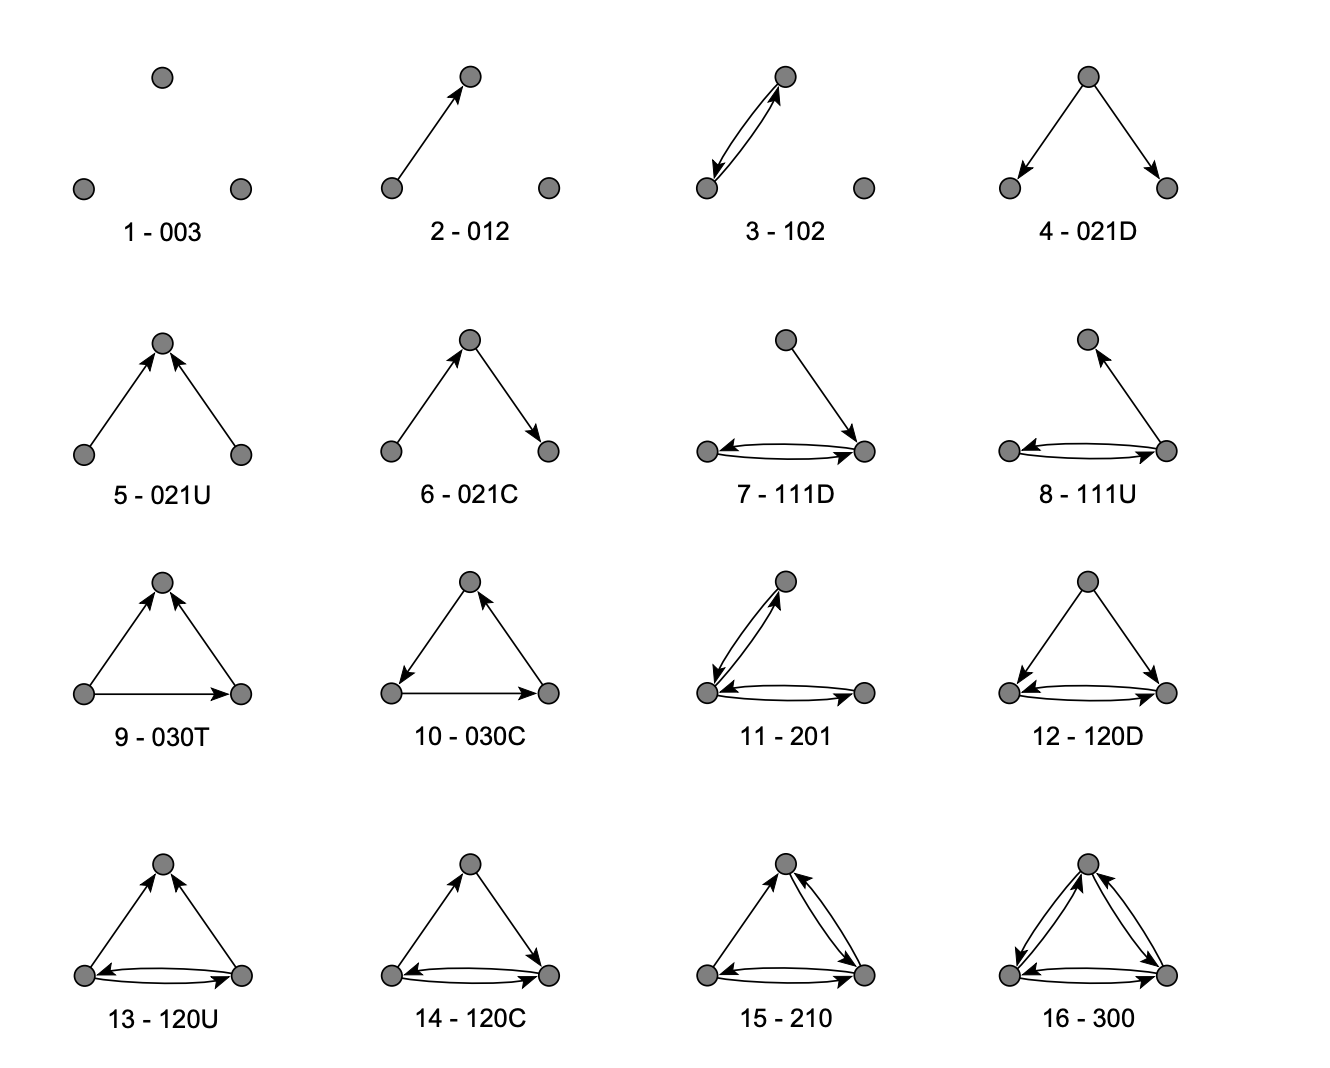

In [ ]:
sorted(nx.triadic_census(G).items(), key=lambda x:x[-1], reverse=True)

[('003', 3007),
 ('012', 2564),
 ('102', 1221),
 ('111D', 436),
 ('111U', 358),
 ('021C', 303),
 ('021U', 265),
 ('021D', 230),
 ('201', 169),
 ('210', 145),
 ('030T', 118),
 ('120C', 98),
 ('120D', 92),
 ('300', 61),
 ('120U', 55),
 ('030C', 17)]

In [ ]:
nx.transitivity(G)

0.39775485436893204

In [ ]:
169/61

2.7704918032786887

###Cliques

In [ ]:
nx.clique.number_of_cliques(G.to_undirected())

{'Aisha Jamil': 27,
 'Amanda Burstein': 11,
 'Ben Gorban': 59,
 'Brett Cowell': 14,
 'Brianna Sclafani': 7,
 'Christine Johnson': 27,
 'Danielle Boekankamp': 3,
 'Danielle Parsons': 8,
 'Dominique Burton': 9,
 'Eiryn Renouard': 14,
 'Elizabeth Fontaine': 10,
 'Erica Richardson': 16,
 'Fern Hernberg': 4,
 'Frank Straub': 4,
 'Garrett Johnson': 2,
 'Heather Vovak': 8,
 'Jane Mott-Palmer': 6,
 'Jen Zeunik': 26,
 'Jim Burch': 24,
 'Julia Kessler': 10,
 'Karen Amendola': 34,
 'Katherine Hoogesteyn': 18,
 'Kerry Yerico': 10,
 'Lorena Singer': 5,
 'Maria Valdovinos Olson Valdovinos': 25,
 'Mary Kate Murphy': 6,
 'Michael Lebron': 12,
 'Pauline Alvarado': 18,
 'Rebecca Benson': 1,
 'Rick Haake': 3,
 'Sarah Vanselow': 4,
 'Sarita Coletrane': 76,
 'Scarlett Ojeda Geldres': 14,
 'Tamara Martin': 3,
 'Travis Riddle': 10,
 'Travis Taniguchi': 24,
 'Trenay Wren-Evans': 8,
 'Virgil Young': 1,
 'Yukun Yang': 23}

In [ ]:
list(nx.find_cliques(G.to_undirected()))

[['Amanda Burstein', 'Eiryn Renouard', 'Travis Taniguchi'],
 ['Amanda Burstein', 'Eiryn Renouard', 'Danielle Parsons'],
 ['Amanda Burstein',
  'Eiryn Renouard',
  'Sarah Vanselow',
  'Kerry Yerico',
  'Julia Kessler'],
 ['Amanda Burstein', 'Eiryn Renouard', 'Sarah Vanselow', 'Brianna Sclafani'],
 ['Amanda Burstein',
  'Ben Gorban',
  'Kerry Yerico',
  'Brett Cowell',
  'Aisha Jamil',
  'Karen Amendola'],
 ['Amanda Burstein',
  'Ben Gorban',
  'Kerry Yerico',
  'Brett Cowell',
  'Julia Kessler'],
 ['Amanda Burstein',
  'Ben Gorban',
  'Kerry Yerico',
  'Sarah Vanselow',
  'Julia Kessler'],
 ['Amanda Burstein', 'Ben Gorban', 'Travis Taniguchi', 'Karen Amendola'],
 ['Amanda Burstein', 'Ben Gorban', 'Danielle Parsons'],
 ['Amanda Burstein', 'Ben Gorban', 'Brianna Sclafani', 'Aisha Jamil'],
 ['Amanda Burstein', 'Ben Gorban', 'Brianna Sclafani', 'Sarah Vanselow'],
 ['Rebecca Benson',
  'Mary Kate Murphy',
  'Christine Johnson',
  'Dominique Burton',
  'Jen Zeunik'],
 ['Sarita Coletrane',
  '

## Does NPF show "small world" characteristics?

We simulate an ER network given the same amount of edges and nodes

Small-world networks should have some spatial structure, which is reflected by a high clustering coefficient. By contrast, random networks have no such structure and a low clustering coefficient.

Small-world networks are efficient in communicating and similar and thus have a small shortest path length, comparable to that of random networks. By contrast, purely spatial networks have a high shortest path length.

In [ ]:
G_ER=nx.gnm_random_graph(len(G.nodes), len(G.edges), directed=True)

In [ ]:
nx.average_shortest_path_length(G_ER)

1.8731443994601888

In [ ]:
nx.average_clustering(G_ER)

0.2350731444244564

In [ ]:
nx.diameter(G_ER)

3

In [ ]:
plot_degree_dist(G_ER, include_hist=True)

In [ ]:
nx.average_shortest_path_length(G)

1.8502024291497976

In [ ]:
nx.average_clustering(G)

0.4407959051312966

In [ ]:
nx.diameter(G.to_undirected())

3

In [ ]:
plot_degree_dist(G, include_hist=True)

# An Interactive Viz of NPF Bonusly Network

In [ ]:
!pip install pyvis

In [ ]:
G_vis=G.copy()

new_node_list=pd.merge(node_list, all_node_metrics, left_on=['display_name'], right_index=True)
new_selected_node_attributes=new_node_list[['display_name','division','job_title','degree_centrality',
       'indegree_centrality', 'outdegree_centrality', 'eigenvector_centrality',
       'closeness_centrality', 'btwness_centrality', 'page_rank',
       'hubs_centrality', 'authority_centrality']]
# assign the column group as any of the coloring column you want to use
new_selected_node_attributes.loc[:,'group']=new_selected_node_attributes['division'].values

# assign the column size as any of the metrics you want to scale
new_selected_node_attributes.loc[:,'size']=new_selected_node_attributes['degree_centrality'].values*10

nx.set_node_attributes(G_vis, new_selected_node_attributes.set_index('display_name').to_dict('index'))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from pyvis.network import Network
from IPython.core.display import display, HTML

g=Network( notebook=False, directed=True, width=700)
g.show_buttons(filter_=['physics'])


g.from_nx(G_vis)

g.show('network.html')
display(HTML('network.html'))